<a href="https://colab.research.google.com/github/ShreshthaJha6/MachineLearningProjects/blob/main/FetalHealthPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install lazypredict
!pip install -U scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset from Google Drive
url = "/content/drive/MyDrive/fetal_health.csv"
df = pd.read_csv(url)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

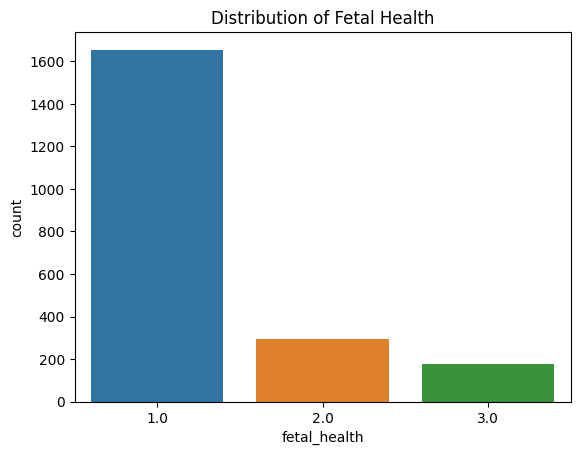

In [ ]:
sns.countplot(x='fetal_health', data=df)
plt.title('Distribution of Fetal Health')
plt.show()

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,...,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00
mean,133.30,0.00,0.01,0.00,0.00,0.00,0.00,46.99,1.33,9.85,...,93.58,164.03,4.07,0.32,137.45,134.61,138.09,18.81,0.32,1.30
std,9.84,0.00,0.05,0.00,0.00,0.00,0.00,17.19,0.88,18.40,...,29.56,17.94,2.95,0.71,16.38,15.59,14.47,28.98,0.61,0.61
min,106.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.20,0.00,...,50.00,122.00,0.00,0.00,60.00,73.00,77.00,0.00,-1.00,1.00
25%,126.00,0.00,0.00,0.00,0.00,0.00,0.00,32.00,0.70,0.00,...,67.00,152.00,2.00,0.00,129.00,125.00,129.00,2.00,0.00,1.00
50%,133.00,0.00,0.00,0.00,0.00,0.00,0.00,49.00,1.20,0.00,...,93.00,162.00,3.00,0.00,139.00,136.00,139.00,7.00,0.00,1.00
75%,140.00,0.01,0.00,0.01,0.00,0.00,0.00,61.00,1.70,11.00,...,120.00,174.00,6.00,0.00,148.00,145.00,148.00,24.00,1.00,1.00
max,160.00,0.02,0.48,0.01,0.01,0.00,0.01,87.00,7.00,91.00,...,159.00,238.00,18.00,10.00,187.00,182.00,186.00,269.00,1.00,3.00


In [ ]:
print("Null values in the dataset:")
print(df.isnull().sum())

Null values in the dataset:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mo

In [ ]:
# Split the dataset into features and target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2126 entries, 0 to 2125
Series name: fetal_health
Non-Null Count  Dtype  
--------------  -----  
2126 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

In [ ]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 86%|████████▌ | 25/29 [00:02<00:00, 10.85it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.251483
[LightGBM] [Info] Start training from score -1.995966
[LightGBM] [Info] Start training from score -2.447951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 10.05it/s]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.96               0.93    None      0.96   
DecisionTreeClassifier             0.92               0.91    None      0.93   
RandomForestClassifier             0.95               0.89    None      0.95   
BaggingClassifier                  0.93               0.89    None      0.93   
ExtraTreesClassifier               0.94               0.87    None      0.94   
AdaBoostClassifier                 0.91               0.85    None      0.91   
LabelPropagation                   0.92               0.83    None      0.91   
LabelSpreading                     0.92               0.83    None      0.91   
SVC                                0.90               0.81    None      0.90   
KNeighborsClassifier               0.92               0.81    None      0.91   
ExtraTreeClassifier                0.87 

In [ ]:
best_model = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_search = GridSearchCV(best_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
print("Best Parameters from Grid Search:", grid_search.best_params_)

Best Parameters from Grid Search: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
random_search = RandomizedSearchCV(best_model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]})

In [ ]:
print("Best Parameters from Random Search:", random_search.best_params_)

Best Parameters from Random Search: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [ ]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=150)

In [ ]:
y_pred = best_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9436619718309859
Precision: 0.9421322928293322
Recall: 0.9436619718309859
F1 Score: 0.9420009573667889


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.77      0.82        64
         3.0       0.89      0.86      0.88        29

    accuracy                           0.94       426
   macro avg       0.91      0.87      0.89       426
weighted avg       0.94      0.94      0.94       426



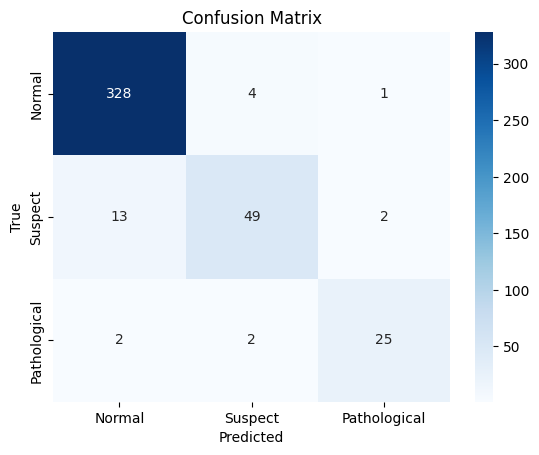

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()